<a href="https://www.kaggle.com/code/onseriomandi/supermarket-sales-analysis?scriptVersionId=213416922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SUPERMARKET SALES

# Data Exploration and Cleaning

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [3]:
#Shape of the data
sales.shape

(1000, 17)

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Number of missing values in the columns
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no missing values.

In [6]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
sales['Date'] = pd.to_datetime(sales['Date'])

we have changed date to datetime from object

In [9]:
#Statistical summary
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


# Data Visualization

In [10]:
#product line perfomance
product_lines = sales['Product line'].unique()
product_lines

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

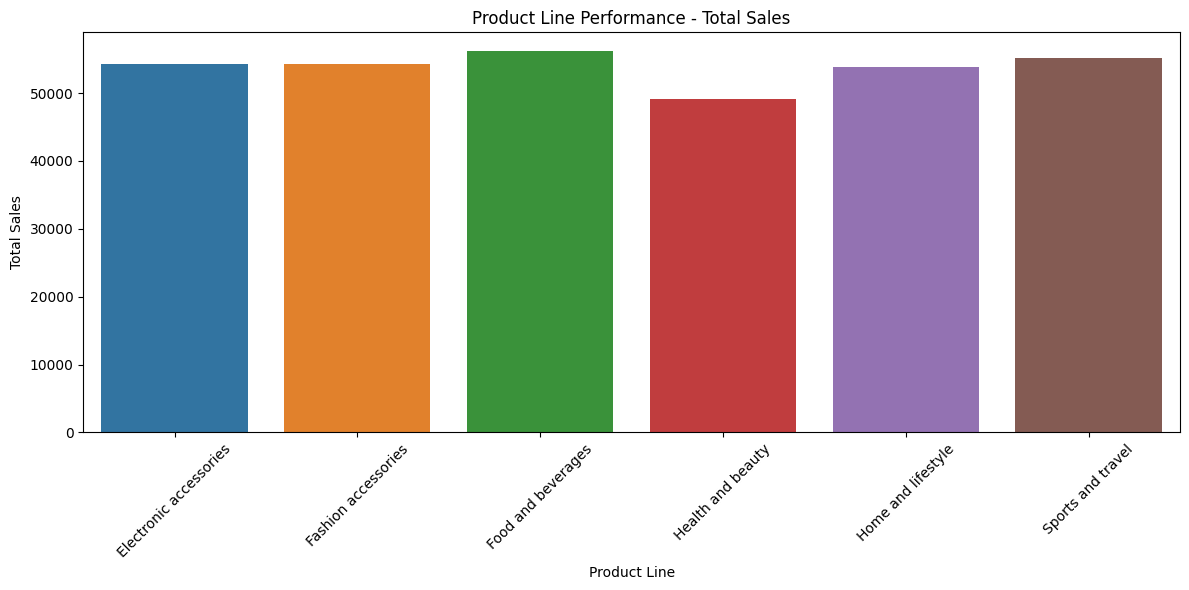

In [11]:
# Product line perfomance using total sales 
product_performance = sales.groupby('Product line')[['Total', 'gross income']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=product_performance, x='Product line', y='Total')
plt.title("Product Line Performance - Total Sales")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Food and Beverages had an overall higher margin of total sales as compared to the other Product lines.

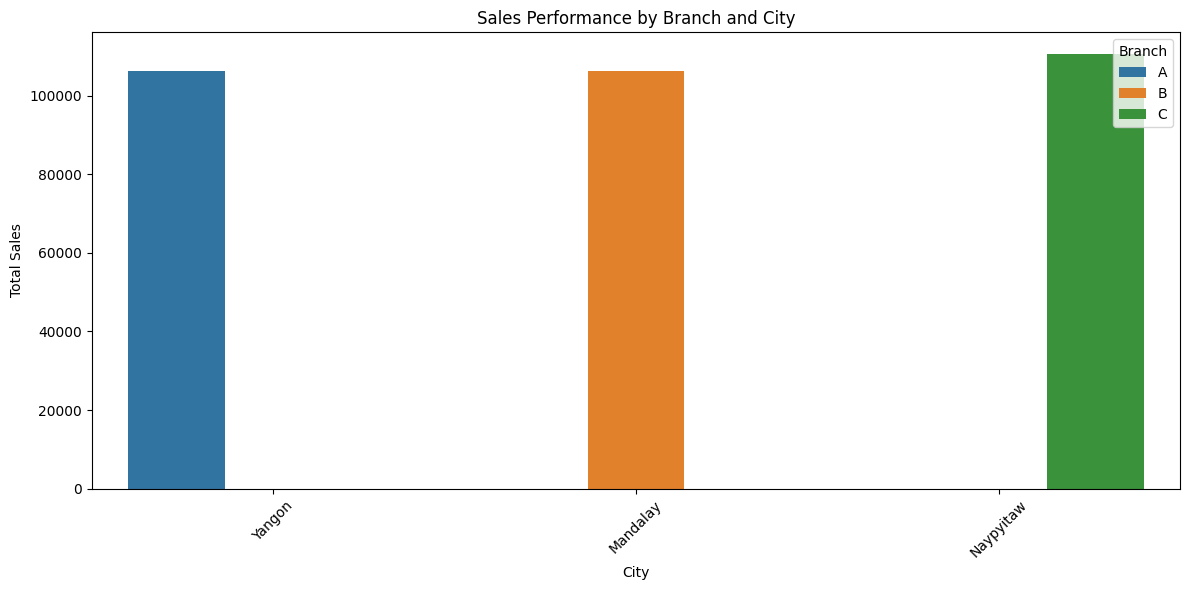

In [12]:
# Sale performance by each Branch
branch_city_performance = sales.groupby(['Branch', 'City'])[['Total', 'gross income']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=branch_city_performance, x='City', y='Total', hue='Branch')
plt.title("Sales Performance by Branch and City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the visual the city Naypyitaw which had Branch C had a higher sales perfomance as compared to the cities with branch A and B. 

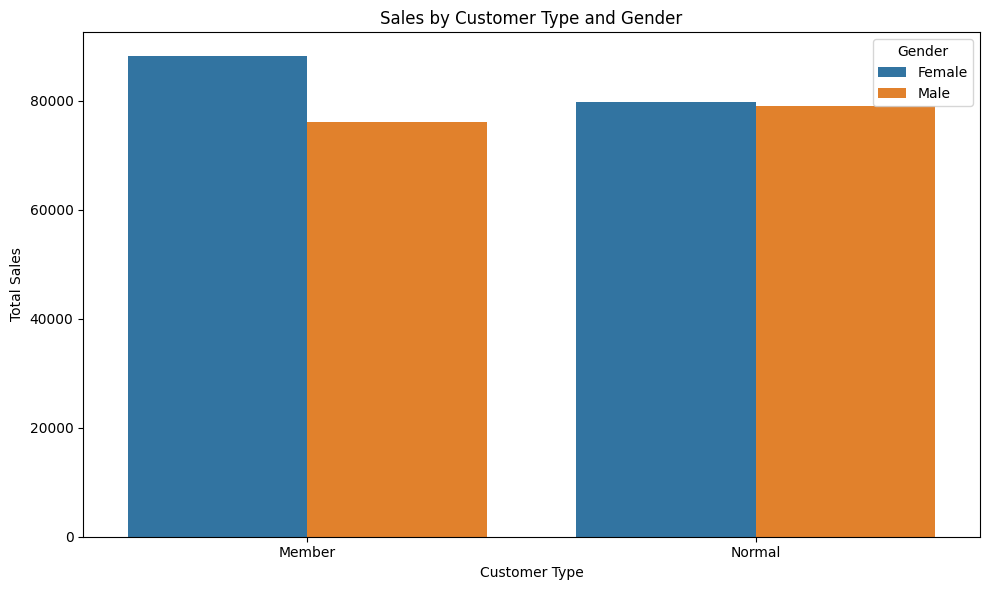

In [13]:
# Sales by Customer Type and Gender
customer_gender_sales = sales.groupby(['Customer type', 'Gender'])[['Total', 'gross income']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_gender_sales, x='Customer type', y='Total', hue='Gender')
plt.title("Sales by Customer Type and Gender")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


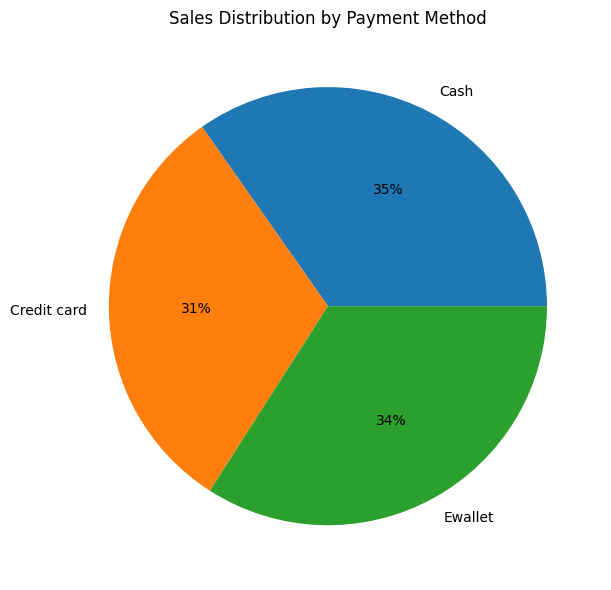

In [14]:
# Payment Method Analysis
payment_sales = sales.groupby('Payment')[['Total']].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(payment_sales['Total'],  autopct='%.0f%%', labels=payment_sales['Payment'])
plt.title("Sales Distribution by Payment Method")
plt.tight_layout()
plt.show()

Most individuals have prefference of using cash as compared to credit card and ewallet. 

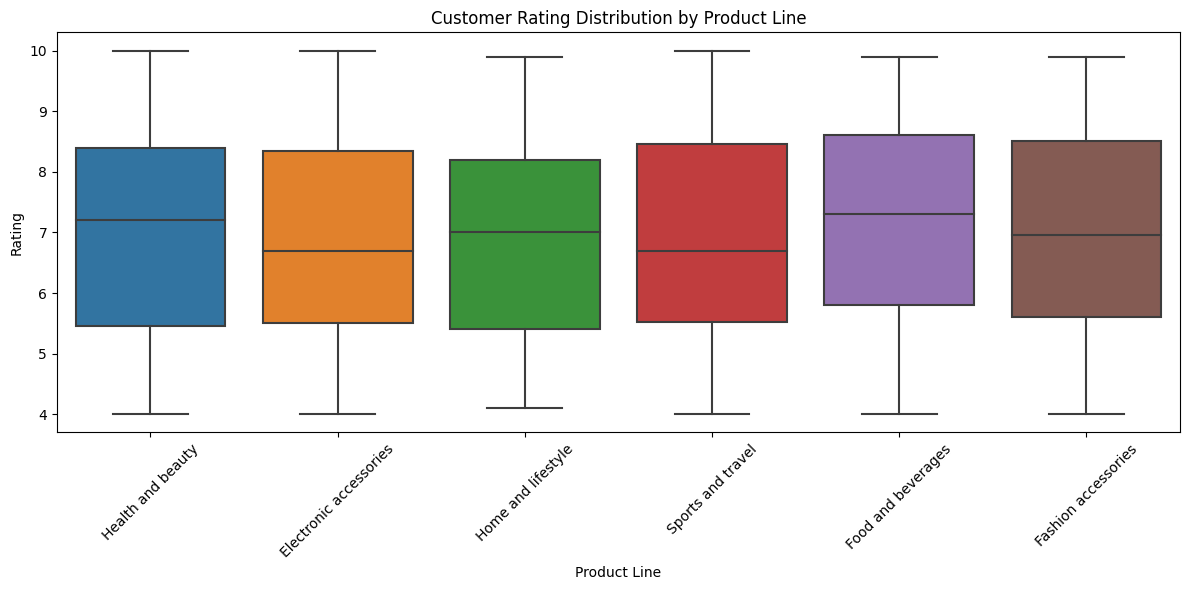

In [15]:
# Rating Distribution by Product Line
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='Product line', y='Rating')
plt.title("Customer Rating Distribution by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

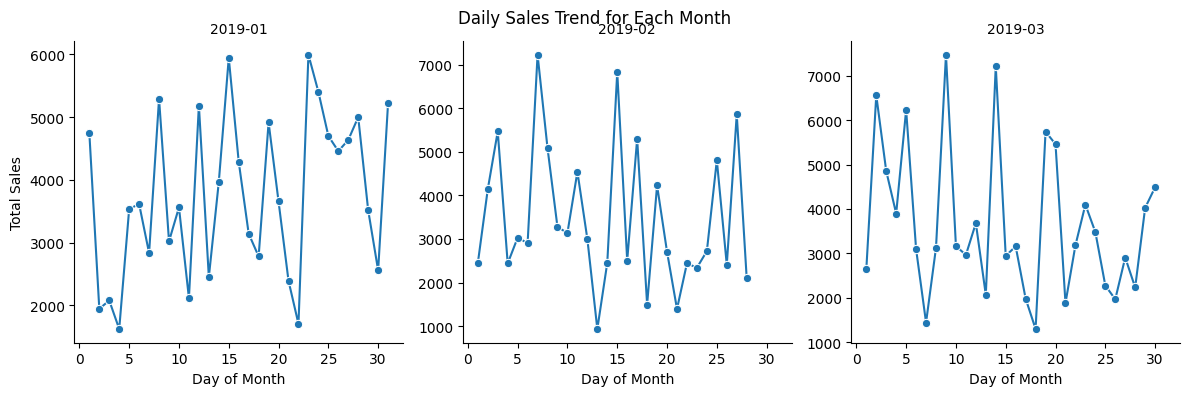

In [16]:
# plotting sales made daily
sales['Month'] = sales['Date'].dt.to_period('M')
sales['Day'] = sales['Date'].dt.day

daily_sales = sales.groupby(['Month', 'Day'])['Total'].sum().reset_index()

daily_sales['Month'] = daily_sales['Month'].astype(str)
g = sns.FacetGrid(daily_sales, col='Month', col_wrap=3, height=4, sharey=False)

g.map(sns.lineplot, 'Day', 'Total', marker='o')

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Day of Month", "Total Sales")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Daily Sales Trend for Each Month")
plt.show()


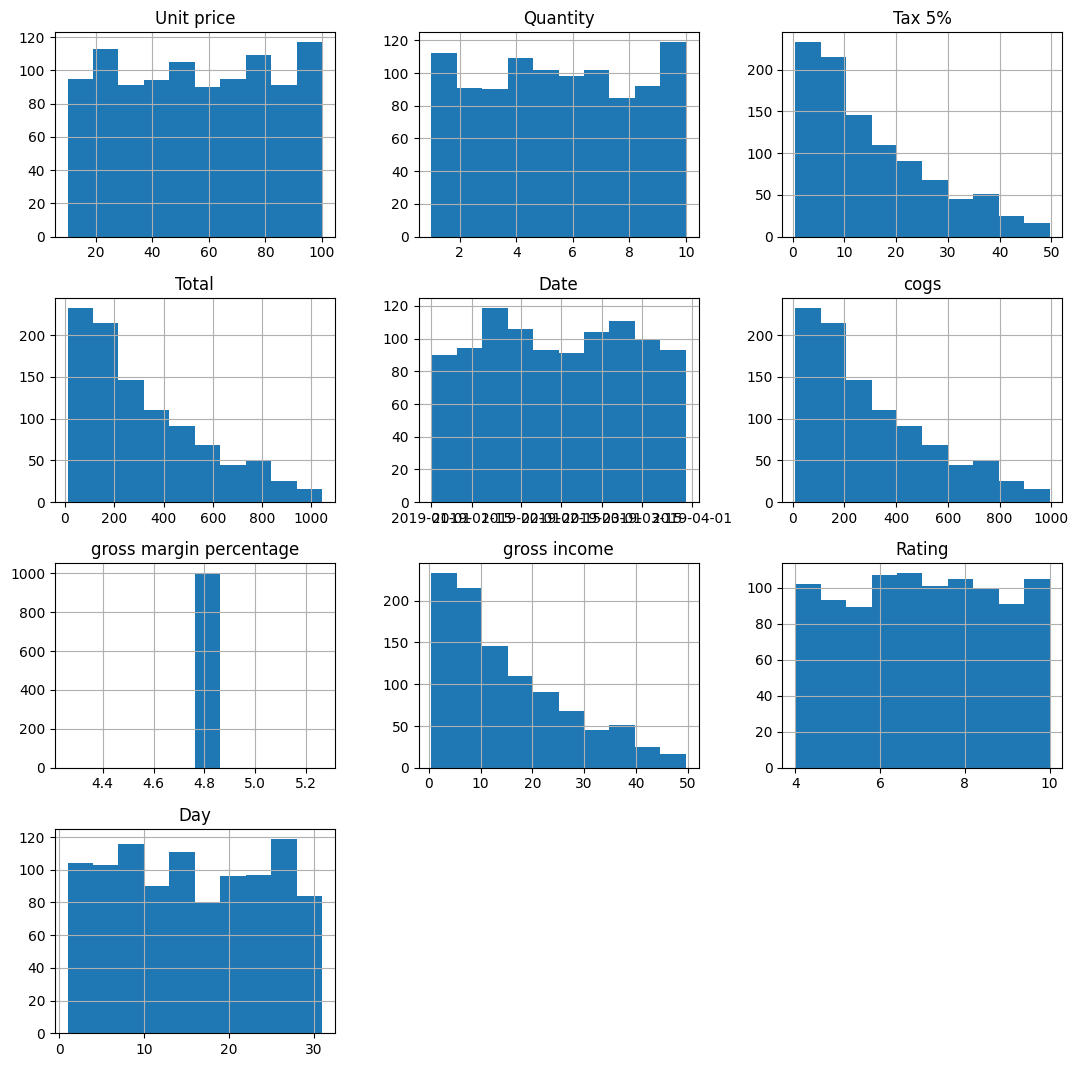

In [17]:
sales.hist(figsize=(13,13))
plt.show()